# <p style="background-color:skyblue; font-family:newtimeroman; font-size:250%; text-align:center; border-radius: 15px 50px;">Computer Vision 1: 🌄 Digital Images Processing</p>

Okey, so first of all let me introduce myself and explain you why i have decided to write this kernel. **My name is Andrés Herranz and I am from Madrid**. I have been working as Data Scientist since 2017 and I have learned many things (although there is still a lot to learn).

The question is that in my career as Data Scientist, almost all the work done related with images has been focus on Deep Learning, and for me, Computer Vision is much more than that. There are many interesting fields in  Computer Vision and a lot to learn a part for Neural Networks. Thats why I am going to start this practices and guides related with all the filds (at least, all the ones that I know) in Computer Vision.

I want to **special thanks to Luis Baumela** (my Computer Vision teacher at the university) that taught me much of this samples and almost of thos knowledge. Also, thanks for the amazing master and all the awesome content you built for us.

## Tutorial index

<p style="font-family:newtimeroman; font-size:135%"><i><a href='https://www.kaggle.com/andreshg/computer-vision-1-digital-images-processing'><b>Part I: Digital Images Processing</b></a></i></p>

<p style="font-family:newtimeroman; font-size:135%"><i><a href='https://www.kaggle.com/andreshg/computer-vision-2-camera-calibration'>Part II: Camera Calibration</a></i></p>

## Objetives

The objetives of this first practice are:
* Program some of the point transformation routines for image processing and analyze the result.
* Study some concepts of image filtering and program some routines for smoothing and edge extraction.
* Implement an image segmentation algorithm and a line extraction algorithm based on Hough transform.

## Requirements

These are the typical tequirements if you are going to run this locally:

* Python 2.7 ó 3.X 
* Jupyter http://jupyter.org/.
* Packages "pip" and  "PyMaxFlow"
* Python scientific libraries: NumPy, SciPy, and Matplotlib.
* PyGame package.
* OpenCV library.

## Basic packages installation

I would recommend Linux Ubuntu 18.04 or higher, and run thew following commands to ensure that everything is installed:

1. Install Python and Jupyter packages

    ``apt install python3
    apt install python-scipy
    apt install python-numpy
    apt install python-matplotlib
    apt install python-opencv
    apt install jupyter
    apt install jupyter-nbconvert``


2. Install PyMaxflow package

   ``pip install PyMaxflow`` or ``pip3 install PyMaxflow``
   
   If you dont have "pip" package installed, just install it with: ``apt install python-pip`` or ``apt install python3-pip``
   
3. Install "pygame" package

    ``apt install python-pygame`` 
    
    If you are using Python 3.X, you should use `pip` package insted: ``pip3 install pygame``

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id="table-of-content"></a>


## <h2 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: navy; background-color: #ffffff;">TABLE OF CONTENTS</h2>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#1">1&nbsp;&nbsp;&nbsp;&nbsp;Puntual transformation</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#2">2&nbsp;&nbsp;&nbsp;&nbsp;Filtering</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#3">3&nbsp;&nbsp;&nbsp;&nbsp;Hough transform</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#4">4&nbsp;&nbsp;&nbsp;&nbsp;Segmentation</a></h3>

---


<a id='1'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">1. Puntual transformations</p>

In this section I recommend that you to use at least the the images I have used image, which you can find in the 'imagenes' directory of the dataset. You can also try with others that you find interesting.

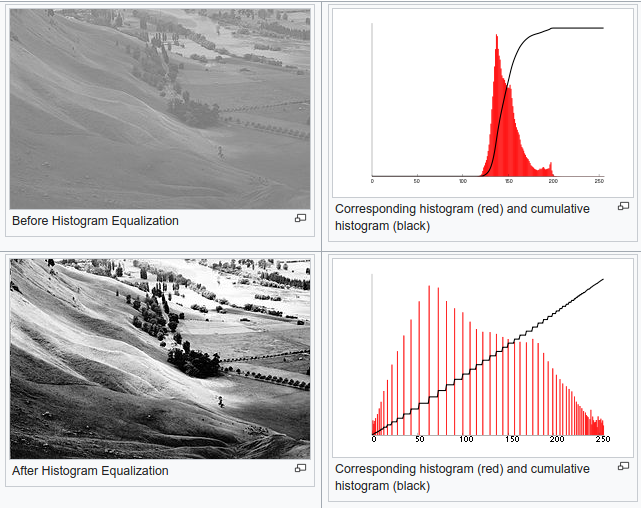

The idea here is to normalize the histogram for better distribution of the pixels values.

\begin{equation}
    h(v) = round \left(\frac
        {cdf(v) - cdf_{min}}
        {\left(M \times N\right) - cdf_{min}} \times \left(L-1\right) 
    \right)
\end{equation}

where cdfmin is the minimum non-zero value of the cumulative distribution function, M × N gives the image's number of pixels (for the example above 64, where M is width and N the height) and L is the number of grey levels used (in most cases, like this one, 256).

<hr>

**Exercise 1.** Load the image ``escilum.tif``. Calculate and show the histogram, for example, usinf the function ``hist()`` from
``matplotlib.pyplot``. Having the histogram, discuss
what problem the image has in the lower left region.

In [33]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

%matplotlib inline

image = cv2.imread("/kaggle/input/computer-vision-course/imagenes/escilum.tif")
# plt.imshow(image)

plt.hist(image.ravel(),256,[0,256])
plt.show()

ModuleNotFoundError: No module named 'cv2'

### Results
The lower left region of the image is very dark and this is reflected in the histogram by the peak on the left side (near 0). The low contrast between the pixels makes it difficult to analyze what objects are in the region.

<hr>

**Exercise 2.** Write a function ``eq_hist(histogram)`` that calculates the point transformation function that equalizes the histogram.
Applies the transformation function to the above image.
Calculates and redisplays the resulting histogram and image, as well as the transformation function.

Discuss the results obtained. What would be the result if we were to re-equalize the resulting image?

In [31]:
import os
import matplotlib.pyplot as plt
import cv2
from pprint import pprint as pp

%matplotlib inline

image = cv2.imread("/kaggle/input/computer-vision-course/imagenes/escilum.tif")
# plt.imshow(image)

hist,bins = np.histogram(image.flatten(),256,[0,256])

def eq_hist(hist):
    # We calculate the distribution function
    cdf = hist.cumsum()

    # Now we create the mask (the operations will be applied to non marked numbers (those distinct to 0))
    cdf_m = np.ma.masked_equal(cdf,0)
    
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    # Transform the integers (we only want the int part)
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    
    return cdf

# CDF: Cumulative Distribution Function 
cdf = eq_hist(hist)
img2 = cdf[image]

hist2,bins2 = np.histogram(img2.flatten(),256,[0,256])

cdf2 = eq_hist(hist2)
img3 = cdf2[img2]
cdf_normalized = cdf2 * hist2.max()/ cdf2.max()

plt.figure()
plt.imshow(img3)

plt.figure()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img3.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

ModuleNotFoundError: No module named 'cv2'

### Results
The result of equalizing the image more than once will always be the same, i.e. we will get the same histogram and the same image. In addition, we can see how in the result the grays are better distributed in the histogram and the image can be seen more clearly.

### Sources

You can check: https://en.wikipedia.org/wiki/Histogram_equalization

<a href="#table-of-content">back to table of content</a>
<a id='2'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">2. Filtering</p>

### Convolutions

Convolution involving one-dimensional signals is referred to as 1D convolution or just convolution. Otherwise, if the convolution is performed between two signals spanning along two mutually perpendicular dimensions (i.e., if signals are two-dimensional in nature), then it will be referred to as 2D convolution. This concept can be extended to involve multi-dimensional signals due to which we can have multi-dimensional convolution.

In the digital domain, convolution is performed by multiplying and accumulating the instantaneous values of the overlapping samples corresponding to two input signals, one of which is flipped. This definition of 1D convolution is applicable even for 2D convolution except that, in the latter case, one of the inputs is flipped twice.

This kind of operation is extensively used in the field of digital image processing wherein the 2D matrix representing the image will be convolved with a comparatively smaller matrix called 2D kernel.

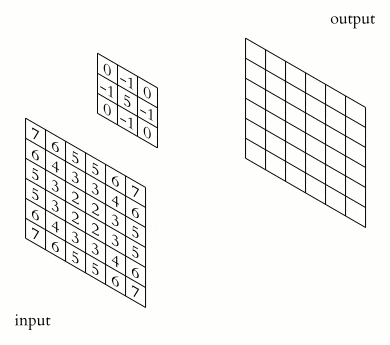

Depending on the parameteres of the ``convolve()`` function, you can either reduce, mantaine or increase resulting matrix size.

**Stride** is the size of the step the convolution filter moves each time. A stride size is usually 1, meaning the filter slides pixel by pixel. By increasing the stride size, your filter is sliding over the input with a larger interval and thus has less overlap between the cells.

The animation below shows stride size 1 in action:

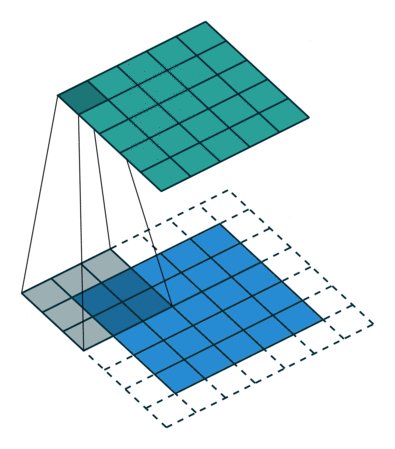

To do the convolutions use the functions ``convolve`` or ``convolve1d`` from ``scipy.ndimage.filters``.


Load the images ``escgaus.bmp`` and ``escimp5.bmp`` which are contaminated respectively
with Gaussian and impulsional noise. You can also use any other images that you find interesting.

In [ ]:
from scipy.ndimage.filters import convolve, convolve1d, gaussian_filter
import math
from skimage import io, viewer
from scipy import fftpack

img1 = cv2.imread('/kaggle/input/computer-vision-course/imagenes/escgaus.bmp', 0)
img2 = cv2.imread('/kaggle/input/computer-vision-course/imagenes/escimp5.bmp', 0)

plt.figure()
plt.imshow(img1, cmap = plt.cm.gray)

plt.figure()
plt.imshow(img2, cmap = plt.cm.gray)

<hr>

**Exercise 3.** Write a function ``masc_gaus(sigma, n)`` that builds a 1-dimension mask for a gaussian filter with *n* shape and *σ* variance. Then filter the images in the previous exercise using bi-dimensional filters and diferent shapes *n* and variances *σ*.

In this exercise you have to implement the function that builds the mask. You cannot use functions that build the mask or perform the filtering automatically.

Show and discuss the results. Paint some of the constructed masks.

In [ ]:
def masc_gaus_1d(sigma, n):
    width = n//2
    dx = 1
    x = np.arange(-width, width)
    kernel_1d = np.exp(-(x ** 2) / (2 * sigma ** 2))
    kernel_1d = kernel_1d / (math.sqrt(2 * np.pi) * sigma)
    
    return kernel_1d

def masc_gaus_2d(sigma, n):
    width = n//2
    dx = 1
    dy = 1
    x = np.arange(-width, width)
    y = np.arange(-width, width)
    x2d, y2d = np.meshgrid(x, y)
    kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
    kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2)
    
    return kernel_2d

In [ ]:
sigma = 5
n = 11

# I have use to compare:
# filter_op = gaussian_filter(img1, 7)

kernel1D = masc_gaus_1d(sigma, n)

t2_kernel1D = kernel1D[:, None]
t_kernel1D = t2_kernel1D.T
k_kernel2D = t2_kernel1D * t_kernel1D

img_convolved_1d1 = convolve(img1, k_kernel2D)
plt.figure()
plt.imshow(img_convolved_1d1, cmap = plt.cm.gray)

img_convolved_1d = convolve1d(img1, kernel1D)
plt.figure()
plt.imshow(img_convolved_1d, cmap = plt.cm.gray)

kernel = masc_gaus_2d(sigma, n)

img_convolved = convolve(img1, kernel)
plt.figure()
plt.imshow(img_convolved, cmap = plt.cm.gray)

### Results
As we can see, when the value of *σ* or *n* is increased, the image becomes more and more distorted until it becomes completely black. However, at low values of either variable, the image remains practically the same as in the original.

### Source
You can check the link: https://en.wikipedia.org/wiki/Gaussian_blur

<hr>

**Exercise 4.** Write a function ``masc_deriv_gaus(sigma, n)`` that constructs a one-dimensional mask of a filter derived from the Gaussian of size *n* and variance *σ*. Filter the image ``corridor.jpg`` with two-dimensional filters derived from the Gaussian to extract the edges of the image. Test it with different values for $n$ and/or $\sigma$.

Show the results and discuss about them.

In [ ]:
def masc_deriv_gaus_1d(sigma, n, order):
    width = n//2
    dx = 1
    x = np.arange(-width, width)
    kernel_1d = x * np.exp(-(x ** 2) / (2 * sigma ** 2))
    kernel_1d = -kernel_1d / (math.sqrt(2 * np.pi) * sigma ** 3)
    
    return kernel_1d

def masc_deriv_gaus_2d(sigma, n, orientation):
    width = n//2
    dx = 1
    dy = 1
    x = np.arange(-width, width)
    y = np.arange(-width, width)
    x2d, y2d = np.meshgrid(x, y)
    if orientation == 1:
        kernel_2d = x2d * np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
    else:
        kernel_2d = y2d * np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
    kernel_2d = -kernel_2d / (2 * np.pi * sigma ** 4)
    
    return kernel_2d

In [29]:
sigma = 7
n = 31
order = 1

# Orientation = 1 means x dervate. Orientation = 2 means y dervate.
orientation = 1

kernel1D_d = masc_deriv_gaus_1d(sigma, n, order)
img_convolved_1d = convolve1d(img1, kernel1D_d)
plt.figure()
plt.imshow(img_convolved_1d, cmap = plt.cm.gray)
# pp(kernel1D_d)

sigma = 4
n = 41

# X-derivate
kernel2D_x = masc_deriv_gaus_2d(sigma, n, orientation)
img_convolved_d2_x = convolve(img1, kernel2D_x)
plt.figure()
plt.imshow(img_convolved_d2_x, cmap = plt.cm.gray)

# Y-derivate
orientation = 2
kernel2D_y = masc_deriv_gaus_2d(sigma, n, orientation)
img_convolved_d2_y = convolve(img1, kernel2D_y)
plt.figure()
plt.imshow(img_convolved_d2_y, cmap = plt.cm.gray)

NameError: name 'masc_deriv_gaus_1d' is not defined

### Results
As we can see, the first order derivative gives us the edges of the image. The *x*-derivative gives us the vertical edges and the *y*-derivative gives us the horizontal edges.

### Source
Check: http://campar.in.tum.de/Chair/HaukeHeibelGaussianDerivatives

<hr>

**Exercise 5.** Compare the execution time of the past convolves when you use ``convolve1d`` and  ``convolve``.
Also, analyze the execution times when you change *n*.

In [ ]:
# Posible ejemplo de código
import time

# ejecuta convoluciones ....
print("Caso base\n")
start_time = time.clock()

sigma = 7
n = 31

kernel1D = masc_gaus_1d(sigma, n)
img_convolved_1d1 = convolve(img1, k_kernel2D)

print("1 Dimensión, Sigma: {}, n: {}. Total time: {} seconds.\n".format(sigma, n, time.clock() - start_time))
start_time = time.clock()

kernel = masc_gaus_2d(sigma, n)
img_convolved = convolve(img1, kernel)

print("2 Dimensión, Sigma: {}, n: {}. Total time: {} seconds.\n".format(sigma, n, time.clock() - start_time))


# ejecuta convoluciones ....
print("Caso con la n aumentada\n")
start_time = time.clock()

sigma = 7
n = 51

kernel1D = masc_gaus_1d(sigma, n)
img_convolved_1d1 = convolve(img1, k_kernel2D)

print("1 Dimension, Sigma: {}, n: {}. Total time: {} seconds.\n".format(sigma, n, time.clock() - start_time))
start_time = time.clock()

kernel = masc_gaus_2d(sigma, n)
img_convolved = convolve(img1, kernel)

print("2 Dimension, Sigma: {}, n: {}. Total time: {} seconds.\n".format(sigma, n, time.clock() - start_time))


# ejecuta convoluciones ....
print("Caso con la sigma aumentada\n")
start_time = time.clock()

sigma = 11
n = 31

kernel1D = masc_gaus_1d(sigma, n)
img_convolved_1d1 = convolve(img1, k_kernel2D)

print("1 Dimension, Sigma: {}, n: {}. Total time: {} seconds.\n".format(sigma, n, time.clock() - start_time))
start_time = time.clock()

kernel = masc_gaus_2d(sigma, n)
img_convolved = convolve(img1, kernel)

print("2 Dimension, Sigma: {}, n: {}. Total time: {} seconds.\n".format(sigma, n, time.clock() - start_time))

### Result


As can be seen, in the case of one dimension, as *n* increases, the time increases very little, and as *sigma* increases, it does not increase much either.

However, in the case of two dimensions, as *n* increases, the times increase drastically, and as *sigma* increases, the difference is very small. This is due to the fact that by increasing the size of the matrix, the computation time is multiplied.

<hr>

**Exercise 6.** Apply the median filter to the images
``escgaus.bmp`` and ``escimp5.bmp`` with different window sizes. Show and discusses the results

To do this exercise you can use ``cv2.medianBlur()`` from OpenCV, ``scipy.ndimage.median_filter()`` from SciPy or build your own function. To do it, create a function called ``mediana(img, n)`` and apply it to the to the image with the function: ``scipy.ndimage.filters()``.



In [ ]:
image = cv2.imread("/kaggle/input/computer-vision-course/imagenes/escgaus.bmp")
fig = plt.figure()
fig.suptitle('Base image', fontsize=18)
plt.imshow(image)

fig = plt.figure()
fig.suptitle('Imagen with n=3', fontsize=18)
plt.imshow(cv2.medianBlur(image,3))

fig = plt.figure()
fig.suptitle('Imagen with n=7', fontsize=18)
plt.imshow(cv2.medianBlur(image,7))

image = cv2.imread("/kaggle/input/computer-vision-course/imagenes/escimp5.bmp")

fig = plt.figure()
fig.suptitle('"Salt & pepper"', fontsize=18)
plt.imshow(image)

fig = plt.figure()
fig.suptitle('"Salt & pepper" with n=7', fontsize=18)
plt.imshow(cv2.medianBlur(image,7))

### Median filter

The median filter is a non-linear digital filtering technique, often used to remove noise from an image or signal. Such noise reduction is a typical pre-processing step to improve the results of later processing (for example, edge detection on an image). Median filtering is very widely used in digital image processing because, under certain conditions, it preserves edges while removing noise, also having applications in signal processing.

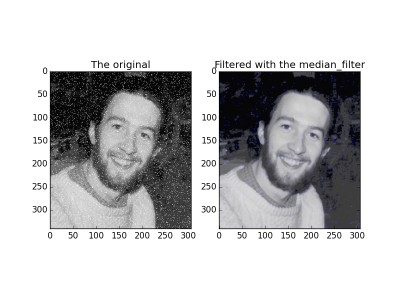

In [ ]:
image = cv2.imread("/kaggle/input/computer-vision-course/imagenes/escimp5.bmp", 0)
fig = plt.figure()
fig.suptitle('Original imagen', fontsize=18)
plt.imshow(image, plt.cm.gray)

kernel = masc_gaus_2d(sigma = 7, n = 25)
img_convolved = convolve(image, kernel)
fig = plt.figure()
fig.suptitle('Gaussian filter', fontsize=18)
plt.imshow(img_convolved,plt.cm.gray)

fig = plt.figure()
fig.suptitle('Median filter', fontsize=18)
plt.imshow(cv2.medianBlur(image,7),plt.cm.gray)

### Results

With images like `escgaus.bmp` the median filter gives results similar to a Gaussian filter. However, when further smoothing is attempted, the image becomes increasingly smeared.

In the case of images with `Salt & Pepper` noise, we can see that the median filter achives very good results, completely eliminating noise from the image.

As can be seen, the median filter has given better results than the Gaussian filter when filtering impulsive noises or the so-called `Salt & Pepper` noises.

### Bilateral filter

A bilateral filter is a non-linear, edge-preserving, and noise-reducing smoothing filter for images. It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels. This weight can be based on a Gaussian distribution. Crucially, the weights depend not only on Euclidean distance of pixels, but also on the radiometric differences (e.g., range differences, such as color intensity, depth distance, etc.). This preserves sharp edges.

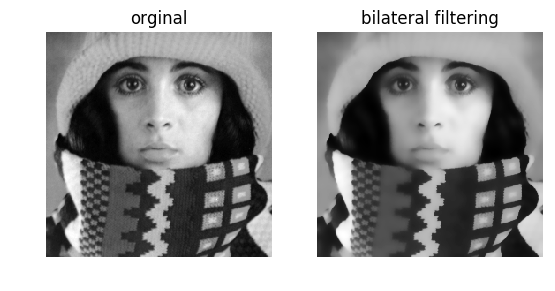

<hr>

**Exercise 7.** Use the function ``cv2.bilateralFilter()`` from OpenCV to perform a bilateral filter on the image.
Select the appropriate parameters and apply them to the images ``escgaus.bmp`` and ``escimp5.bmp``.

If we call $\sigma_r$ to the variance of the Gaussian that controls the weighting due to the difference between pixel values and $\sigma_s$ to the variance of the Gaussian that controls the weighting due to pixel position, answer thr following questions:

* How does the bilateral filter behave when variance $\sigma_r$ is too high? In this case, what happens when $\sigma_s$ is high or low?
* How does it behave when $\sigma_r$ is too low? In this case, how does th filter behaves when $\sigma_s$ is high and low?

Show and discuss about the results with different parameter values.

In [27]:
image = cv2.imread("/kaggle/input/computer-vision-course/imagenes/escgaus.bmp")

fig = plt.figure()
fig.suptitle('Original image', fontsize=18)
plt.imshow(image)

fig = plt.figure()
fig.suptitle('n=9 σr=10 σs=75', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,9,10,75))

fig = plt.figure()
fig.suptitle('n=20 σr=10 σs=150', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,20,10,150))

fig = plt.figure()
fig.suptitle('n=9 σr=100 σs=10', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,9,100,10))

fig = plt.figure()
fig.suptitle('n=9 σr=100 σs=50', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,9,100,50))

fig = plt.figure()
fig.suptitle('n=20 σr=100 σs=10', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,20,100,10))

NameError: name 'cv2' is not defined

### Result

With `escgaus.bmp` and the bilateral filter we obtain better results than those seen with the Gaussian or the median filter. The $\sigma_s$ configuration allows us to control the edges of the small structures we want to protect while sigma $\sigma_r$ allows us to control the level of smoothing we want in the image.

In [25]:
image = cv2.imread("/kaggle/input/computer-vision-course/imagenes/escimp5.bmp")
fig = plt.figure()
fig.suptitle('Original image', fontsize=18)
plt.imshow(image)

fig = plt.figure()
fig.suptitle('n=5 σr=9 σs=75', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,5,9,75))

fig = plt.figure()
fig.suptitle('n=20 σr=9 σs=100', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,20,9,100))

fig = plt.figure()
fig.suptitle('n=20 σr=200 σs=200', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,20,200,200))

fig = plt.figure()
fig.suptitle('n=10 σr=400 σs=10', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,10,400,10))

NameError: name 'cv2' is not defined

### Result


Unlike in the previous section, given an image with "Salt & Pepper" noise such as `escimp5.bmp` the bilateral filter does not give good results, being a better option to use the median filter to remove the "Salt & Pepper" noise.

In [23]:
image = cv2.imread("/kaggle/input/computer-vision-course/imagenes/flower.png")
fig = plt.figure()
fig.suptitle('Original image', fontsize=18)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

fig = plt.figure()
fig.suptitle('n=9 σr=100 σs=10', fontsize=18)
plt.imshow(cv2.cvtColor(cv2.bilateralFilter(image,9,100,10), cv2.COLOR_BGR2RGB))

fig = plt.figure()
fig.suptitle('n=20 σr=10 σs=100', fontsize=18)
plt.imshow(cv2.cvtColor(cv2.bilateralFilter(image,20,10,100), cv2.COLOR_BGR2RGB))

fig = plt.figure()
fig.suptitle('n=30 σr=10 σs=100', fontsize=18)
plt.imshow(cv2.cvtColor(cv2.bilateralFilter(image,30,10,100), cv2.COLOR_BGR2RGB))

fig = plt.figure()
fig.suptitle('n=20 σr=50 σs=100', fontsize=18)
plt.imshow(cv2.cvtColor(cv2.bilateralFilter(image,20,50,100), cv2.COLOR_BGR2RGB))

fig = plt.figure()
fig.suptitle('n=30 σr=50 σs=100', fontsize=18)
plt.imshow(cv2.cvtColor(cv2.bilateralFilter(image,30,50,100), cv2.COLOR_BGR2RGB))

NameError: name 'cv2' is not defined

### Answers

Answering the questions:

* How does the bilateral filter behave when variance $\sigma_r$ is too high? In this case, what happens when $\sigma_s$ is high or low?
* How does it behave when $\sigma_r$ is too low? In this case, how does th filter behaves when $\sigma_s$ is high and low?

To answer this question, firstly we need to understand the parameters of the bilateral filter:

   - As sigma sub-r ($\sigma_r$) becomes larger the bilateral filter behaves more and more like a Gaussian filter.
   - As sigma sub-s ($\sigma_s$) gets larger the bilateral filter smooths smaller and smaller structures. With a small sigma sub-s ($\sigma_s$) these small structures and edges are protected in the smoothing.
 
Lets test it with some examples:

In [21]:
image = cv2.imread("/kaggle/input/computer-vision-course/imagenes/flower.png")
fig = plt.figure()
fig.suptitle('Original image', fontsize=18)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

fig = plt.figure()
fig.suptitle('n=20 σr=100 σs=2', fontsize=18)
plt.imshow(cv2.cvtColor(cv2.bilateralFilter(image,20,100,2), cv2.COLOR_BGR2RGB))

fig = plt.figure()
fig.suptitle('n=20 σr=100 σs=200', fontsize=18)
plt.imshow(cv2.cvtColor(cv2.bilateralFilter(image,20,100,200), cv2.COLOR_BGR2RGB))

NameError: name 'cv2' is not defined

### Result

To understand the filter, let's compare the second and third images by looking at the green leaf in the lower right corner. As you can see:

   - By having a high sigma sub-s ($\sigma_s$ = 200, third image) the edges of the smaller structures are ignored and disappears, as can be seen in the green leaf. 

   - Having a low sigma sub-s ($\sigma_s$ = 2, second image) protects the edges of the smaller structures when smoothing the image. This can be seen by looking at the green leaf in the second image and comparing it with the one in the third image..
   
Comparing the second image with the third we can see that the edges have been protected much better with a low $\sigma_s$.

Having a high $\sigma_r$ affects the level of image smoothing. This can be seen in the following code fragment:

In [19]:
image = cv2.imread("/kaggle/input/computer-vision-course/imagenes/flower.png")
fig = plt.figure()
fig.suptitle('Original image', fontsize=18)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

fig = plt.figure()
fig.suptitle('n=20 σr=10 σs=200', fontsize=18)
plt.imshow(cv2.cvtColor(cv2.bilateralFilter(image,20,10,200), cv2.COLOR_BGR2RGB))

fig = plt.figure()
fig.suptitle('n=20 σr=10 σs=2', fontsize=18)
plt.imshow(cv2.cvtColor(cv2.bilateralFilter(image,20,10,2), cv2.COLOR_BGR2RGB))

NameError: name 'cv2' is not defined

### Result

Comparing the results of this code fragment with the results of the previous code fragment we can see that if $\sigma_r$ acquires a high value the image is smoothed more intensely. When $\sigma_r$ acquires a very high value it starts to behave like a Gaussian mask, but when it acquires a low value the filter does not soften the image at all.

On the other hand, in this example with a low $\sigma_r$ we can see that even if $\sigma_s$ acquires very high or very low values the result is still the same; since the image is almost not smoothed, the edges of the image are not altered and the resulting image is very similar to the initial image. We can see that with a $\sigma_r = 10$ the shadow of the lower right leaf has been smoothed, but as it has been a very soft smoothing the edges have not been altered and both in the image with high $\sigma_s$ and in the one with low $\sigma_s$ the edges are still maintained.

<a href="#table-of-content">back to table of content</a>
<a id='3'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">3. Hough transform</p>

<hr>

**Exercise 8.** Use the Hough transform to find linear segments in the image ``corridor.jpg``. To extract the edges of the image, use the functions written in exercises 3 and 4. Use the function ``cv2.HoughLinesP()`` from OpenCV.

Tune the parameteres and use different functions to extract the edges. Then discuss about the results (you can take a look at, https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html).

In [ ]:
def masc_2deriv_gaus_1d(sigma, n, order):
    width = n//2
    dx = 1
    x = np.arange(-width, width)
    kernel_1d = (sigma ** 2 - x ** 2) * np.exp(-(x ** 2) / (2 * sigma ** 2))
    kernel_1d = -kernel_1d / (math.sqrt(2 * np.pi) * sigma ** 5)
    
    return kernel_1d

def masc_2deriv_gaus_2d_x_or_y(sigma, n, orientation):
    width = n//2
    dx = 1
    dy = 1
    x = np.arange(-width, width)
    y = np.arange(-width, width)
    x2d, y2d = np.meshgrid(x, y)
    
    kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 4)) / (2 * np.pi * sigma ** 4)

    # Caso derivada en función de x
    if orientation == 1:
        kernel_2d = (-1 + (x2d ** 2 / sigma ** 2)) * kernel_2d
    # Caso derivada en función de y
    else:
        kernel_2d = (-1 + (y2d ** 2 / sigma ** 2)) * kernel_2d
    
    return kernel_2d

def masc_2deriv_gaus_2d_xy(sigma, n):
    width = n//2
    dx = 1
    dy = 1
    x = np.arange(-width, width)
    y = np.arange(-width, width)
    x2d, y2d = np.meshgrid(x, y)
    
    kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
    kernel_2d = (x2d * y2d / (2 * np.pi * sigma ** 6)) * kernel_2d
    
    return kernel_2d

In [17]:
from scipy.ndimage.filters import convolve, convolve1d, gaussian_filter

sigma = 1.08
n = 35

image = cv2.cvtColor(cv2.imread('/kaggle/input/computer-vision-course/imagenes/corridor.jpg'), cv2.COLOR_BGR2RGB)
fig = plt.figure()
fig.suptitle('Original image', fontsize=18)
plt.imshow(image)

gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
fig = plt.figure()
fig.suptitle('Gray-scale image', fontsize=18)
plt.imshow(gray, cmap = plt.cm.gray)

kernel2D_x = masc_2deriv_gaus_2d_xy(sigma, n)
edges = convolve(gray, kernel2D_x)
fig = plt.figure()
fig.suptitle('Borders image', fontsize=18)
plt.imshow(edges, cmap = plt.cm.gray)

lines = cv2.HoughLinesP(edges,rho = 1,theta = 1*np.pi/180,threshold = 100,minLineLength = 100,maxLineGap = 50)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imwrite('/kaggle/input/computer-vision-course/imagenes/corridor_hough.jpg',image)
fig = plt.figure()
fig.suptitle('Hough transform image', fontsize=18)
plt.imshow(cv2.imread('/kaggle/input/computer-vision-course/imagenes/corridor_hough.jpg'))

C:\Users\sanja\AppData\Local\Temp\ipykernel_21420\968027951.py:1: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve, convolve1d, gaussian_filter
C:\Users\sanja\AppData\Local\Temp\ipykernel_21420\968027951.py:1: DeprecationWarning: Please import `convolve1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve, convolve1d, gaussian_filter
C:\Users\sanja\AppData\Local\Temp\ipykernel_21420\968027951.py:1: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve, convolve1d, gaussian_filter


NameError: name 'cv2' is not defined

In [15]:
from scipy.ndimage.filters import convolve, convolve1d, gaussian_filter

sigma = 2.08
n = 35

image = cv2.cvtColor(cv2.imread('/kaggle/input/computer-vision-course/imagenes/corridor.jpg'), cv2.COLOR_BGR2RGB)
fig = plt.figure()
fig.suptitle('Original image', fontsize=18)
plt.imshow(image)

gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

kernel2D_x = masc_2deriv_gaus_2d_xy(sigma, n)
edges = convolve(gray, kernel2D_x)
fig = plt.figure()
fig.suptitle('Borders image', fontsize=18)
plt.imshow(edges, cmap = plt.cm.gray)

lines = cv2.HoughLinesP(edges,rho = 1,theta = 1*np.pi/180,threshold = 100,minLineLength = 100,maxLineGap = 50)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imwrite('/kaggle/input/computer-vision-course/imagenes/corridor_hough.jpg',image)
fig = plt.figure()
fig.suptitle('Hough transform image', fontsize=18)
plt.imshow(cv2.imread('/kaggle/input/computer-vision-course/imagenes/corridor_hough.jpg'))

C:\Users\sanja\AppData\Local\Temp\ipykernel_21420\3948519381.py:1: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve, convolve1d, gaussian_filter
C:\Users\sanja\AppData\Local\Temp\ipykernel_21420\3948519381.py:1: DeprecationWarning: Please import `convolve1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve, convolve1d, gaussian_filter
C:\Users\sanja\AppData\Local\Temp\ipykernel_21420\3948519381.py:1: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve, convolve1d, gaussian_filter


NameError: name 'cv2' is not defined

In [13]:
from scipy.ndimage.filters import convolve, convolve1d, gaussian_filter

sigma = 0.5
n = 10

image = cv2.cvtColor(cv2.imread('/kaggle/input/computer-vision-course/imagenes/corridor.jpg'), cv2.COLOR_BGR2RGB)
fig = plt.figure()
fig.suptitle('Original image', fontsize=18)
plt.imshow(image)

gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
kernel2D_x = masc_2deriv_gaus_2d_xy(sigma, n)
edges = convolve(gray, kernel2D_x)
fig = plt.figure()
fig.suptitle('Borders image', fontsize=18)
plt.imshow(edges, cmap = plt.cm.gray)

lines = cv2.HoughLinesP(edges,rho = 1,theta = 1*np.pi/180,threshold = 100,minLineLength = 100,maxLineGap = 50)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imwrite('/kaggle/input/computer-vision-course/imagenes/corridor_hough.jpg',image)
fig = plt.figure()
fig.suptitle('Hough transform image', fontsize=18)
plt.imshow(cv2.imread('/kaggle/input/computer-vision-course/imagenes/corridor_hough.jpg'))

C:\Users\sanja\AppData\Local\Temp\ipykernel_21420\1398429096.py:1: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve, convolve1d, gaussian_filter
C:\Users\sanja\AppData\Local\Temp\ipykernel_21420\1398429096.py:1: DeprecationWarning: Please import `convolve1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve, convolve1d, gaussian_filter
C:\Users\sanja\AppData\Local\Temp\ipykernel_21420\1398429096.py:1: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve, convolve1d, gaussian_filter


NameError: name 'cv2' is not defined

### Results

Playing with the different parameters we get some effects or others; with a low sigma we get more edges, while with a high sigma we will find more selected and clearer edges.

### Optional

Now lets try the same with ``cv.Canny()`` to find the edges in the sudoku picture.
- ``cv.line()``: https://docs.opencv.org/master/d6/d6e/group__imgproc__draw.html#ga7078a9fae8c7e7d13d24dac2520ae4a2
- ``cv.HoughLines()``: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html

> Everything explained above is encapsulated in the OpenCV function, ``cv.HoughLines()``. It simply returns an array of ($\rho, \theta$) values. $\rho$ is measured in pixels and $\theta$ is measured in radians. **First parameter**, Input image should be a binary image, so apply threshold or use ``cv.Canny()`` edge detection before finding applying hough transform. **Second and third parameters** are $\rho$ and $\theta$ accuracies respectively. **Fourth argument** is the threshold, which means minimum vote it should get for it to be considered as a line. Remember, number of votes depend upon number of points on the line. So it represents the minimum length of line that should be detected.


In [11]:
image = cv2.imread('/kaggle/input/opencv-samples-images/data/sudoku.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

# Grayscale and Canny Edges extracted
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

plt.subplot(2, 2, 1)
plt.title("edges")
plt.imshow(edges)

# Run HoughLines using a rho accuracy of 1 pixel
# Theta accuracy of np.pi / 180
# Our line threshold is set to 200 (number of points on line)
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# We iterate through each line and convert it to the format
# required by cv.lines
for line in lines:
    rho, theta = line[0]
    
    a = np.cos(theta)
    b = np.sin(theta)
    
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)


plt.subplot(2, 2, 2)
plt.title("Hough Lines")
plt.imshow(image)

NameError: name 'cv2' is not defined

<hr>

**Exercise 9.** In this exercise we will apply the knowledge from the last exercise to find the contours of some figures in the image ``pic3.png``. To extract the edges of the image and the contours, use the functions ``cv2.Canny()`` and ``cv2.findContours()`` from OpenCV.

You can find some helpuf information in the documentation: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html

In [ ]:
# Let's load an image with some figures
image = cv2.imread('/kaggle/input/opencv-samples-images/data/pic3.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)


# Grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)

plt.subplot(2, 2, 2)
plt.title("Canny Edges")
plt.imshow(edged)


# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

plt.subplot(2, 2, 3)
plt.title("Canny Edges After Contouring")
plt.imshow(edged)

print("Number of figures (contours) found = " + str(len(contours)))

# Draw all contours
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), 3)

plt.subplot(2, 2, 4)
plt.title("Contours")
plt.imshow(image)

<hr>

**Exercise 10.** In this exercise we will apply the knowledge from the last exercise to find the contours of some figures in the image ``hand.jpg``. After that, we will try to approximate the contours using Convex Hull with the function ``cv2.convexHull``.

Discuss about the methods used and how they work (you can take a look at, https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html).

In [ ]:
image = cv2.imread('/kaggle/input/opencv-samples-images/hand.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)

# Threshold the image
ret, thresh = cv2.threshold(gray, 176, 255, 0)

# Find contours 
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    
# Sort Contors by area and then remove the largest frame contour
n = len(contours) - 1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

# Iterate through contours and draw the convex hull
for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(image, [hull], 0, (0, 255, 0), 2)

    plt.subplot(1, 2, 2)
    plt.title("Convex Hull")
    plt.imshow(image)

From the OpenCV documentation:

> Convex Hull will look similar to contour approximation, but it is not (Both may provide same results in some cases). Here, cv2.convexHull() function checks a curve for convexity defects and corrects it. Generally speaking, convex curves are the curves which are always bulged out, or at-least flat. And if it is bulged inside, it is called convexity defects. For example, check the below image of hand. Red line shows the convex hull of hand. The double-sided arrow marks shows the convexity defects, which are the local maximum deviations of hull from contours.

```python
hull = cv2.convexHull(points[, hull[, clockwise[, returnPoints]]
```

Arguments details:

* **points** are the contours we pass into.
* **hull** is the output, normally we avoid it.
* **clockwise** : Orientation flag. If it is `True`, the output convex hull is oriented clockwise. Otherwise, it is oriented counter-clockwise.
* **returnPoints** : By default, `True`. Then it returns the coordinates of the hull points. If `False`, it returns the indices of contour points corresponding to the hull points.

<a href="#table-of-content">back to table of content</a>
<a id='4'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">4. Segmentation</p>

In this section we are going to talk about common segmentation algorithms and we will apply some of them.

Ref: https://docs.opencv.org/3.4/d1/dc5/tutorial_background_subtraction.html
Ref: https://www.kaggle.com/bulentsiyah/learn-opencv-by-examples-with-python (also cool guidelines)

* **Background subtraction (BS)** is a common and widely used technique for generating a foreground mask (namely, a binary image containing the pixels belonging to moving objects in the scene) by using static cameras.
* As the name suggests, BS calculates the foreground mask performing a subtraction between the current frame and a background model, containing the static part of the scene or, more in general, everything that can be considered as background given the characteristics of the observed scene.

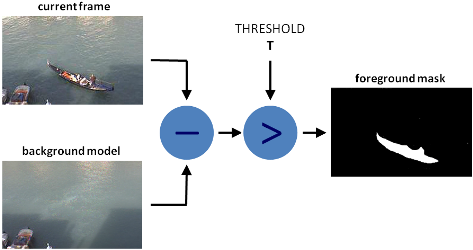

* Background modeling consists of two main steps:

    1. Background Initialization;
    2. Background Update.

In the first step, an initial model of the background is computed, while in the second step that model is updated in order to adapt to possible changes in the scene.

In [ ]:
algo = 'MOG2'

if algo == 'MOG2':
    backSub = cv2.createBackgroundSubtractorMOG2()
else:
    backSub = cv2.createBackgroundSubtractorKNN()

plt.figure(figsize=(20, 20))

frame = cv2.imread('/kaggle/input/opencv-samples-images/Background_Subtraction_Tutorial_frame.png')
fgMask = backSub.apply(frame)

plt.subplot(2, 2, 1)
plt.title("Frame")
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 2)
plt.title("FG Mask")
plt.imshow(cv2.cvtColor(fgMask, cv2.COLOR_BGR2RGB))

frame = cv2.imread('/kaggle/input/opencv-samples-images/Background_Subtraction_Tutorial_frame_1.png')
fgMask = backSub.apply(frame)

plt.subplot(2, 2, 3)
plt.title("Frame")
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 4)
plt.title("FG Mask")
plt.imshow(cv2.cvtColor(fgMask, cv2.COLOR_BGR2RGB))

### Now lets try on video

This part will only works locally so feel free to fork or download and try it yourself.

In [ ]:
algo = 'MOG2'
inputt = '/kaggle/input/opencv-samples-images/video_input/Background_Subtraction_Tutorial_frame.mp4'

capture = cv2.VideoCapture(cv2.samples.findFileOrKeep(inputt))
frame_width = int(capture.get(3))
frame_height = int(capture.get(4))

out = cv2.VideoWriter('Background_Subtraction_Tutorial_frame_output.mp4',cv2.VideoWriter_fourcc('M','J','P','G'),30, (frame_width,frame_height))

if algo == 'MOG2':
    backSub = cv2.createBackgroundSubtractorMOG2()
else:
    backSub = cv2.createBackgroundSubtractorKNN()

# If you want to run it on video and locally, you must set it to (While) True. (Do not try on Kaggle you will get the error)
while False:
    
    ret, frame = capture.read()
    
    if frame is None:
        break
    
    fgMask = backSub.apply(frame)
    
    cv2.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)

    cv2.imshow('Frame', frame)
    cv2.imshow('FG Mask', fgMask)
    
    out.write(cv2.cvtColor(fgMask, cv2.COLOR_BGR2RGB))
    
    keyboard = cv2.waitKey(1) & 0xFF;
        
    if (keyboard == 27 or keyboard == ord('q')):
        cv2.destroyAllWindows()
        break;
        
capture.release()
out.release()

# If you want to run it on video and locally, you must set it to (While) True. (Do not try on Kaggle you will get the error)
if False:
    cv2.destroyAllWindows()

## Alpha-Expansion

The main idea of the alpha-expansion algorithm is to successively segment all $\alpha$ and non-$\alpha$ pixels with graph cuts and the algorithm will change the value of $\alpha$ at each iteration. The algorithm will iterate through each possible label for $\alpha$ until it converges.

At each iteration, the $\alpha$ region $\mathcal{P}_\alpha$ can only expand. This changes somehow the way to set the graph weights. Also when two neighboring nodes does not currently have the same label, an intermediate node is inserted and links are weighted so they are relative to the distance to the $\alpha$ label.

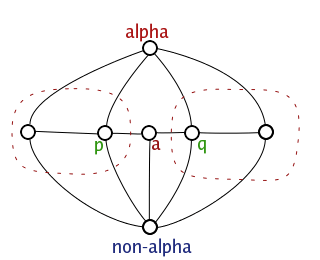

Ref. https://profs.etsmtl.ca/hlombaert/energy/

## Alpha-Beta Swap

The main idea of the alpha-beta swap algorithm is to successively segment all $\alpha$ pixels from $\beta$ pixels with graph cuts and the algorithm will change the $\alpha-\beta$ combination at each iteration. The algorithm will iterate through each possible combination until it converges.

Within an iteration the graph is constructed in a normal way so it can segment efficiently between the $\alpha$ region and the $\beta$ region. Special care must be taken with nodes that are neither in the $\alpha$ nor in the $\beta$ region. That means, for a pixel, the terminal link weight is the data term plus the sum of all links to neighbors which are neither in the $\alpha$ nor in the $\beta$ region.


As `pygame` doesn't work on Kaggle Environment (web-based environments in general) you should download the code and run it locally to get it working.

You can use this code: 

```python
import pygame
import numpy as np
import cv2
import sys

def roundline(srf, color, start, end, radius=1):
    dx = end[0]-start[0]
    dy = end[1]-start[1]
    distance = max(abs(dx), abs(dy))
    for i in range(distance):
        x = int( start[0]+float(i)/distance*dx)
        y = int( start[1]+float(i)/distance*dy)
        pygame.draw.circle(srf, color, (x, y), radius)
        
def select_fg_bg(img, radio=2):
    """ Shows image img on a window and lets you mark in red, green and blue 
        pixels in the image.
        img: numpy array with the image to be labeled
        radio: is the radio of the circumference used as brush
        returns: a numpy array that is the image painted
    """
    # Creates the screen where the image will be displayed
    # Shapes are reversed in img and pygame screen
    screen = pygame.display.set_mode(img.shape[-2::-1])

#    imgpyg=pygame.image.load(imgName)
    imgpyg=pygame.image.frombuffer(img,img.shape[-2::-1],'RGB')
    screen.blit(imgpyg,(0,0))
    pygame.display.flip() # update the display

    draw_on = False
    last_pos = (0, 0)
    color_red = (255, 0, 0)
    color_green = (0,255,0)
    color_blue = (0,0,255)

    while True:
        e = pygame.event.wait()
        if e.type == pygame.QUIT:
            break
        if e.type == pygame.MOUSEBUTTONDOWN:
            if pygame.mouse.get_pressed()[0]:
                color=color_red
            elif pygame.mouse.get_pressed()[2]:
                color=color_green
            else:
                color=color_blue
            pygame.draw.circle(screen, color, e.pos, radio)
            draw_on = True
        if e.type == pygame.MOUSEBUTTONUP:
            draw_on = False
        if e.type == pygame.MOUSEMOTION:
            if draw_on:
                pygame.draw.circle(screen, color, e.pos, radio)
                roundline(screen, color, e.pos, last_pos,  radio)
            last_pos = e.pos
        pygame.display.flip()

    imgOut=np.ndarray(shape=img.shape[:2]+(4,),dtype='u1',buffer=screen.get_buffer().raw)
    pygame.quit()

    return(cv2.cvtColor(imgOut[:,:,:3],cv2.COLOR_BGR2RGB))
```

```python
#################################
# Simplified segmentation algorithem with "Grab Cut"
# by Luis Baumela. UPM. 15-10-2015
# Universidad Politécnica de Madrid
#################################

#######################################################################
# This code lets you paint on top of an image and returns the painted image
# it can be used to select pixels somehow in an image
# 
# It requires that you install "python-pygame" and "python-opencv"
#
# The interesting funcion here is "select_fg_bg" read documentation below
#######################################################################


import numpy as np
from scipy.misc import imread
import math
import maxflow
import matplotlib.pyplot as plt
from pprint import pprint as pp

imgName='imagenes/horse.jpg'
sigma = 0.7

img = imread(imgName)

# You should implement the function to select some foreground and background points
markedImg = select_fg_bg(img)

# Create the graph.
g = maxflow.Graph[float]()

# Add the nodes. nodeids has the identifiers of the nodes in the grid.
nodeids = g.add_grid_nodes(img.shape[:2])
pp(nodeids)

# Calculate the cost of non-terminal nodes of the graph
h, w =img.shape[:2]
def bpq(ip, iq, sigma):
    return math.exp(-((np.linalg.norm(ip, 2)-np.linalg.norm(iq, 2))**2)/2*sigma**2)

exp_aff_h = np.ones(img.shape[:2])
exp_aff_v = np.ones(img.shape[:2])

# Calculate the costs for the horizontal neighborhood
for i in range(0, h):
    for j in range(1, w):
        exp_aff_h[i, j] = bpq(img[i][j], img[i][j-1], sigma)

# Calculate the costs for the vertical neighborhood 
for i in range(1, h):
    for j in range(0, w):
        exp_aff_v[i, j] = bpq(img[i][j], img[i-1][j], sigma)

# Build the gprah filling the structures
hor_struc=np.array([[0, 0, 0],
                    [1, 0, 0],
                    [0, 0, 0]])
ver_struc=np.array([[0, 1, 0],
                    [0, 0, 0],
                    [0, 0, 0]])

# Create the graph
g.add_grid_edges(nodeids, exp_aff_h, structure=hor_struc,symmetric=True)
g.add_grid_edges(nodeids, exp_aff_v, structure=ver_struc,symmetric=True)

# Read the labeled points
# The red points should represent the foreground (object)
pts_fg = np.transpose(np.where(np.all(np.equal(markedImg,(255,0,0)),2)))
# The green ones should represent the background
pts_bg = np.transpose(np.where(np.all(np.equal(markedImg,(0,255,0)),2)))

# Fill the conections for the non-terminal nodes
# Weights for the non-terminal nodes
fg = np.ones(img.shape[:2])
bg = np.ones(img.shape[:2])
fg = fg * 55
bg = bg * 55

for fg_p in pts_fg:
    fg[fg_p[0]][fg_p[1]] = np.inf
    bg[fg_p[0]][fg_p[1]] = 0

for bg_p in pts_bg:
    fg[bg_p[0]][bg_p[1]] = 0
    bg[bg_p[0]][bg_p[1]] = np.inf

# Weights for the terminal nodes
g.add_grid_tedges(nodeids, fg, bg)

# Find the maximum flow.
g.maxflow()
# Get the segments of the nodes in the grid.
sgm = g.get_grid_segments(nodeids)

# Print the segmentation result
plt.figure()
plt.imshow(np.uint8(np.logical_not(sgm)), cmap = plt.cm.gray)
plt.show()

# Show the result
plt.figure()
wgs=(np.float_(np.logical_not(sgm))+0.3)/1.3

# Replicate the weights for each channel and order the indexes
wgs=np.rollaxis(np.tile(wgs,(3,1,1)),0,3)
plt.imshow(np.uint8(np.multiply(img,wgs)))
plt.show()
```